# Rural and Remote Areas Admission Analysis
This notebook provides a deep dive into students from Rural and Remote-Underdeveloped clusters, focusing on gender performance, district trends, and college distribution. Useful for education policy makers and planners.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the prepared data
df = pd.read_excel('cleaned_clustered_admissions(15).xlsx')
df.head()

,no,formid,index_no,name,ge,uace_,dcode,dname,course_code,course_name,tot_wt,program_name,cluster,region,college
0,1,25APF900350094290048,U2789/905,Nimusiima Sandrah,F,2024,55.0,WAKISO,ACC,BSC. Accounting (EVE),42.7,BSC. Accounting (EVE),URBAN-CITY,CENTRAL,COBAMS
1,2,25APF561140686250786,U0025/529,Bulukuku Daniel Ephraim,M,2014,93.0,KIBUKU,ACC,BSC. Accounting (EVE),42.3,BSC. Accounting (EVE),RURAL-AGRICULTURAL,EASTERN,COBAMS
2,3,25APF530278631275455,U2977/518,Mirembe Elizabeth,F,2024,16.0,KAMPALA,ACC,BSC. Accounting (EVE),41.1,BSC. Accounting (EVE),URBAN-CITY,CENTRAL,COBAMS
3,4,25APF1346250173272930,U1664/712,Namata Martha,F,2024,33.0,MASAKA,ACC,BSC. Accounting (EVE),40.7,BSC. Accounting (EVE),URBAN-CITY,CENTRAL,COBAMS
4,5,25APF1553620758303031,U0004/754,Nakalema Joyce,F,2024,33.0,MASAKA,ACC,BSC. Accounting (EVE),40.3,BSC. Accounting (EVE),URBAN-CITY,CENTRAL,COBAMS


## Gender Distribution

C:\Users\User\AppData\Local\Temp\ipykernel_13456\3944449054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ge', palette='Set2')


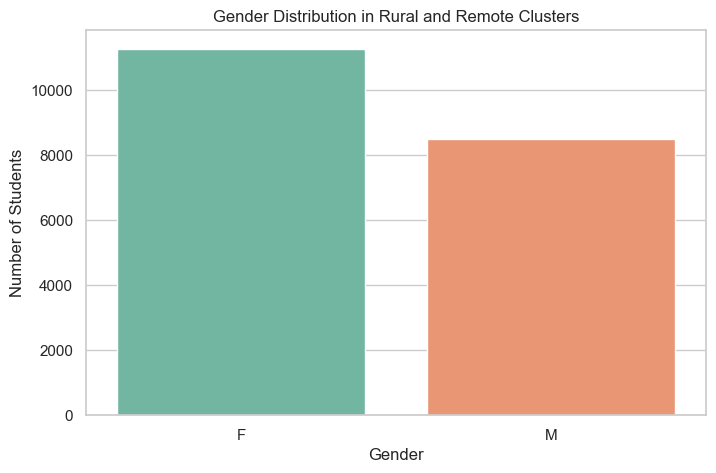

In [3]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='ge', palette='Set2')
plt.title('Gender Distribution in Rural and Remote Clusters')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()

## Gender-wise Average Performance

C:\Users\User\AppData\Local\Temp\ipykernel_13456\1969087580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_perf, x='ge', y='tot_wt', palette='coolwarm')


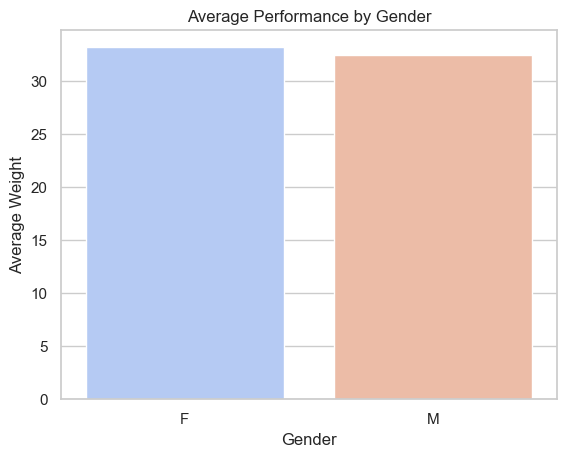

In [4]:
avg_perf = df.groupby('ge')['tot_wt'].mean().reset_index()
sns.barplot(data=avg_perf, x='ge', y='tot_wt', palette='coolwarm')
plt.title('Average Performance by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Weight')
plt.show()

## Top 10 Districts (by Student Count)

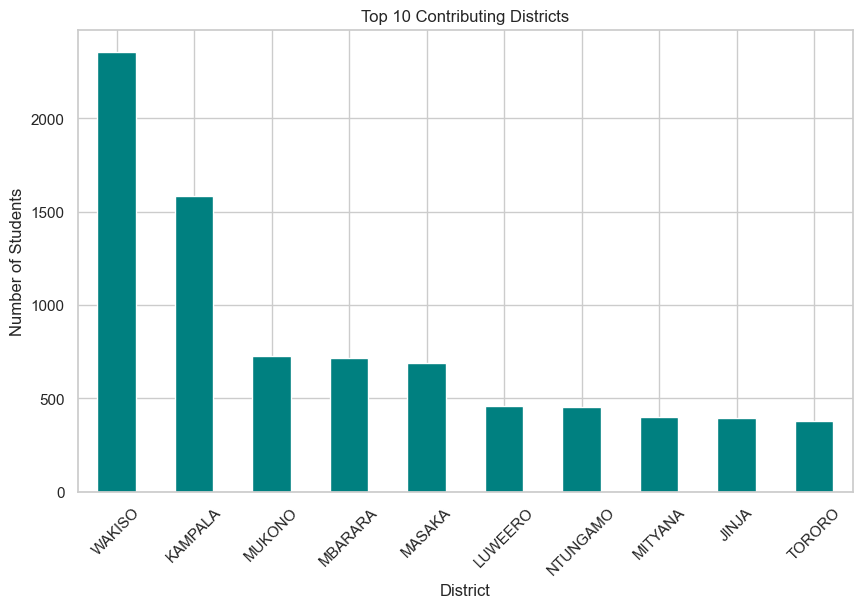

In [5]:
top_districts = df['dname'].value_counts().head(10)
top_districts.plot(kind='bar', figsize=(10,6), color='teal')
plt.title('Top 10 Contributing Districts')
plt.ylabel('Number of Students')
plt.xlabel('District')
plt.xticks(rotation=45)
plt.show()

## Districts with Highest Average Performance

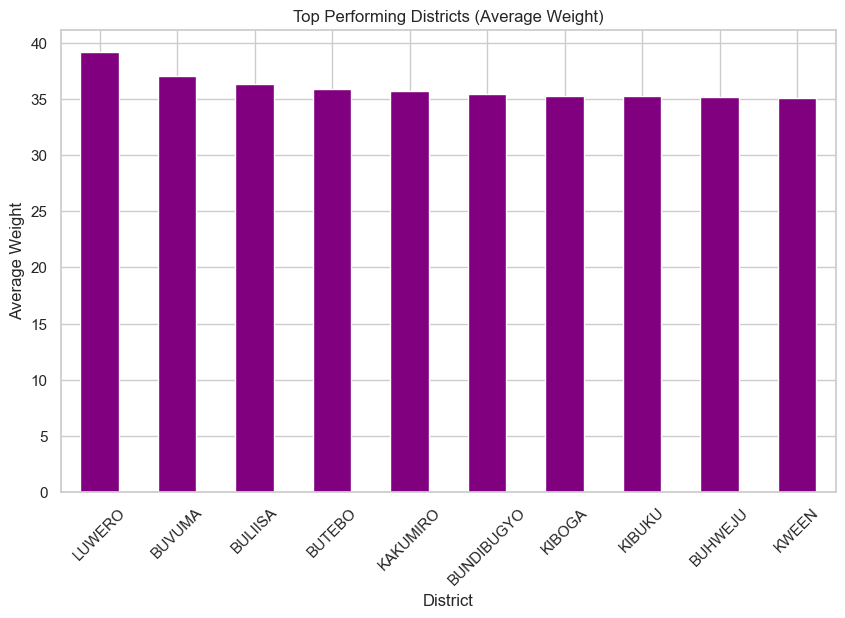

In [6]:
district_perf = df.groupby('dname')['tot_wt'].mean().sort_values(ascending=False).head(10)
district_perf.plot(kind='bar', figsize=(10,6), color='purple')
plt.title('Top Performing Districts (Average Weight)')
plt.ylabel('Average Weight')
plt.xlabel('District')
plt.xticks(rotation=45)
plt.show()

## College Preferences of Rural & Remote Students

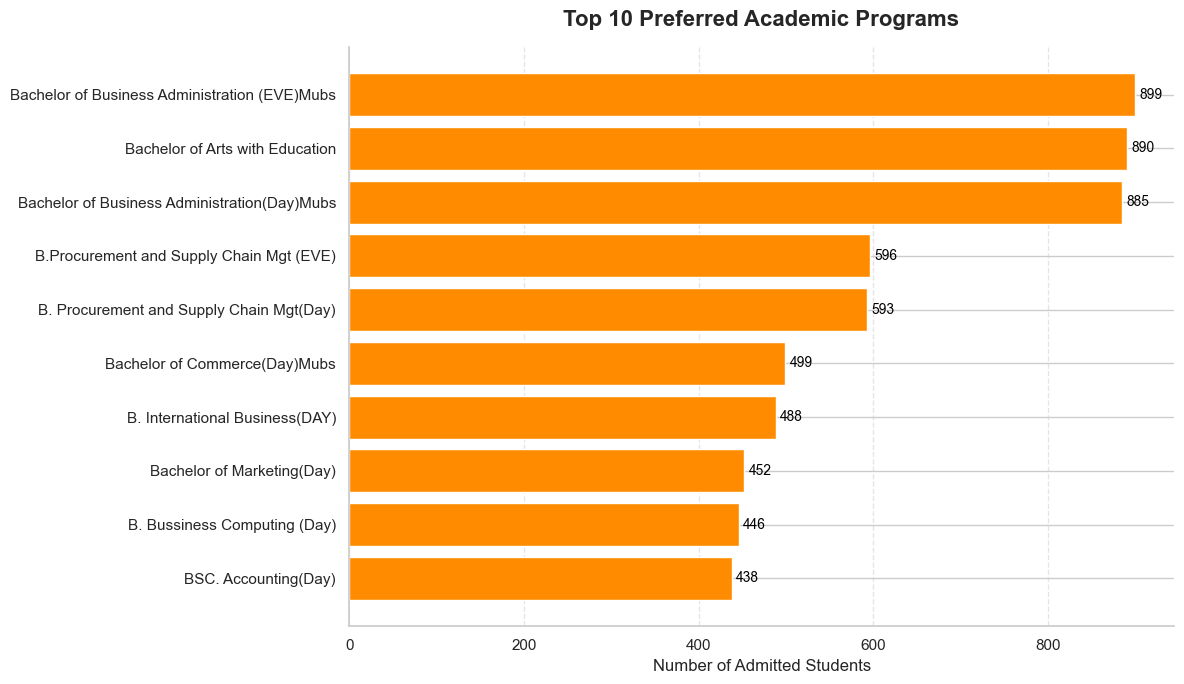

In [10]:
import matplotlib.pyplot as plt

# Get top 10 preferred programs
college_pref = df['program_name'].value_counts().head(10)

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(college_pref.index, college_pref.values, color='darkorange')

# Title and labels
ax.set_title('Top 10 Preferred Academic Programs', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Number of Admitted Students', fontsize=12)
ax.invert_yaxis()  # Highest at the top

# Add value labels to bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 5, bar.get_y() + bar.get_height() / 2,
            f'{int(width)}', va='center', ha='left', fontsize=10, color='black')

# Style enhancements
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### LEAST APPLIED FOR COURSES

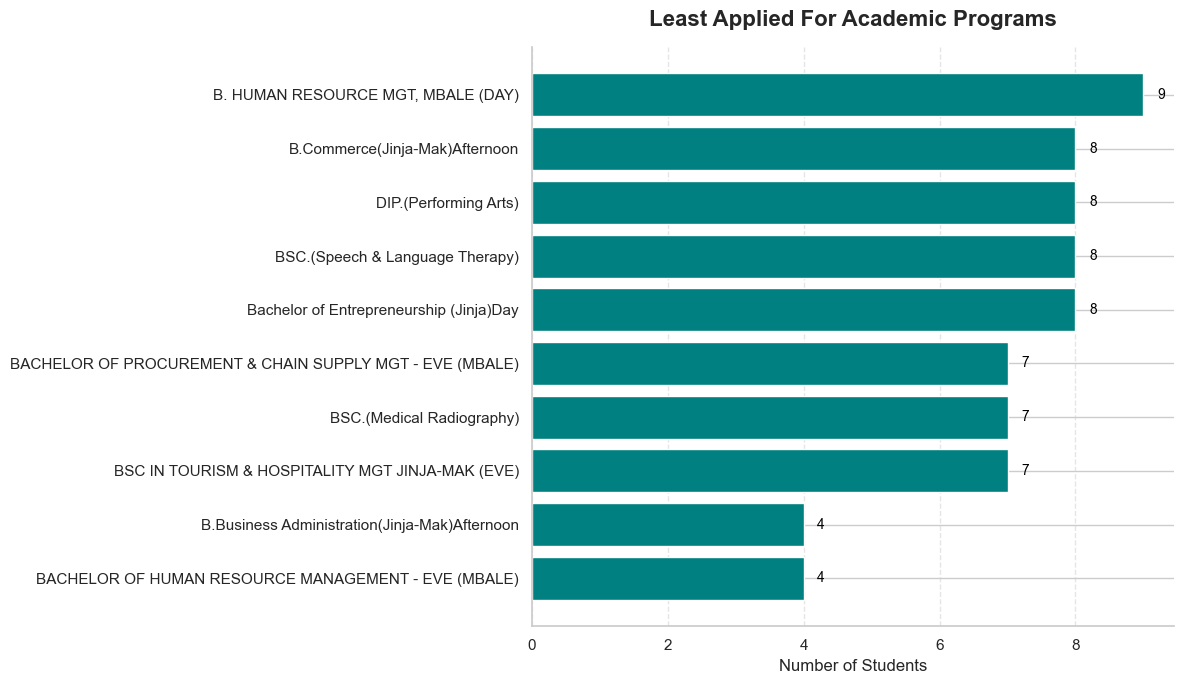

In [13]:
import matplotlib.pyplot as plt

# Get bottom 10 least applied for programs
college_pref = df['program_name'].value_counts().tail(10)

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(college_pref.index, college_pref.values, color='#008080')

# Title and labels
ax.set_title('Least Applied For Academic Programs', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Number of Students', fontsize=12)
ax.invert_yaxis()  # Least popular at top for visibility

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.2, bar.get_y() + bar.get_height() / 2,
            f'{int(width)}', va='center', ha='left', fontsize=10, color='black')

# Style enhancements
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Interactive Gender vs Program Heatmap

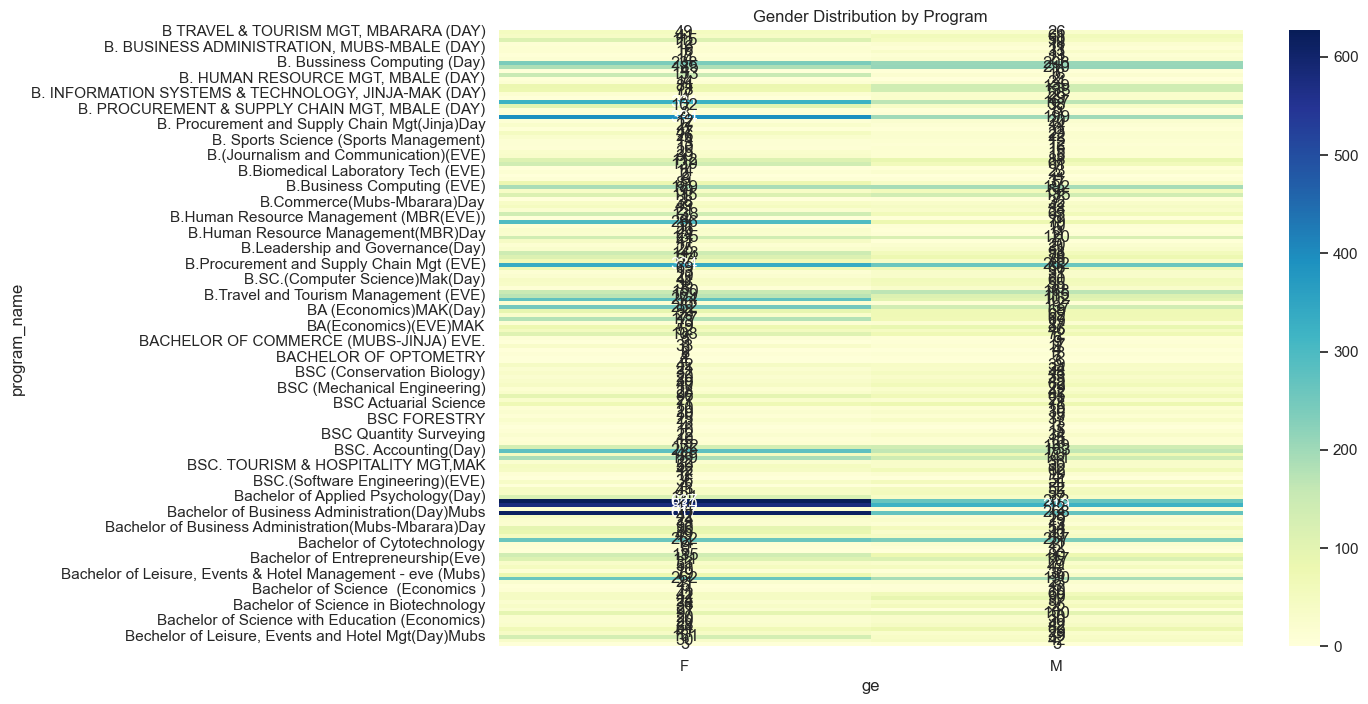

In [9]:
cross = df.groupby(['program_name', 'ge']).size().unstack().fillna(0)
plt.figure(figsize=(12,8))
sns.heatmap(cross, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Gender Distribution by Program')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13456\2375777076.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rural_remote_df, x='cluster', palette='crest')
C:\Users\User\AppData\Local\Temp\ipykernel_13456\2375777076.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


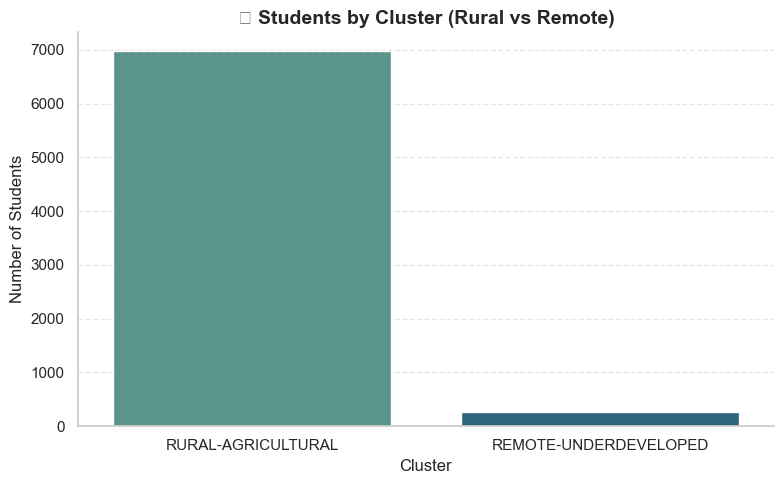

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter rural and remote students
rural_remote_df = df[df['cluster'].isin(['RURAL-AGRICULTURAL', 'REMOTE-UNDERDEVELOPED'])]

plt.figure(figsize=(8, 5))
sns.countplot(data=rural_remote_df, x='cluster', palette='crest')
plt.title('📊 Students by Cluster (Rural vs Remote)', fontsize=14, weight='bold')
plt.xlabel('Cluster')
plt.ylabel('Number of Students')
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_13456\4244165352.py:8: UserWarning: Glyph 128105 (\N{WOMAN}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_13456\4244165352.py:8: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_13456\4244165352.py:8: UserWarning: Glyph 128104 (\N{MAN}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128105 (\N{WOMAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128104 (\N{MAN})

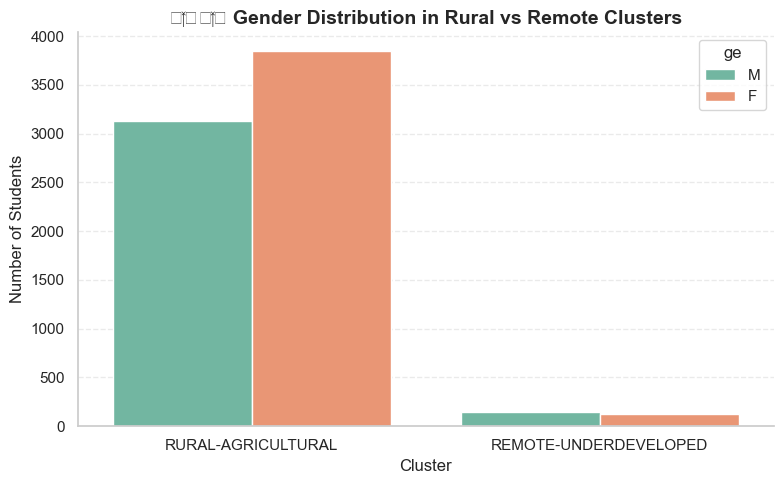

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(data=rural_remote_df, x='cluster', hue='ge', palette='Set2')
plt.title('👩‍🎓👨‍🎓 Gender Distribution in Rural vs Remote Clusters', fontsize=14, weight='bold')
plt.xlabel('Cluster')
plt.ylabel('Number of Students')
plt.grid(axis='y', linestyle='--', alpha=0.4)
sns.despine()
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_13456\533568740.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rural_districts.values, y=top_rural_districts.index, palette='Set1')


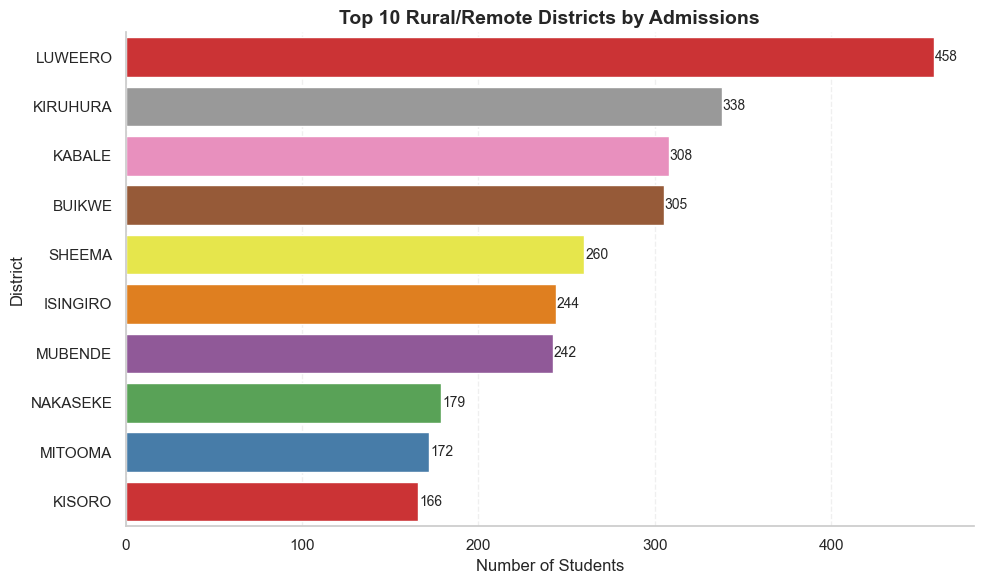

In [21]:
top_rural_districts = rural_remote_df['dname'].value_counts().head(10).sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=top_rural_districts.values, y=top_rural_districts.index, palette='Set1')

# Add labels
for index, value in enumerate(top_rural_districts.values):
    plt.text(value + 0.5, index, str(int(value)), va='center', fontsize=10)

plt.title('Top 10 Rural/Remote Districts by Admissions', fontsize=14, weight='bold')
plt.xlabel('Number of Students')
plt.ylabel('District')
plt.grid(axis='x', linestyle='--', alpha=0.3)
sns.despine()
plt.gca().invert_yaxis()  # Puts the best at the top
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_13456\11828903.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


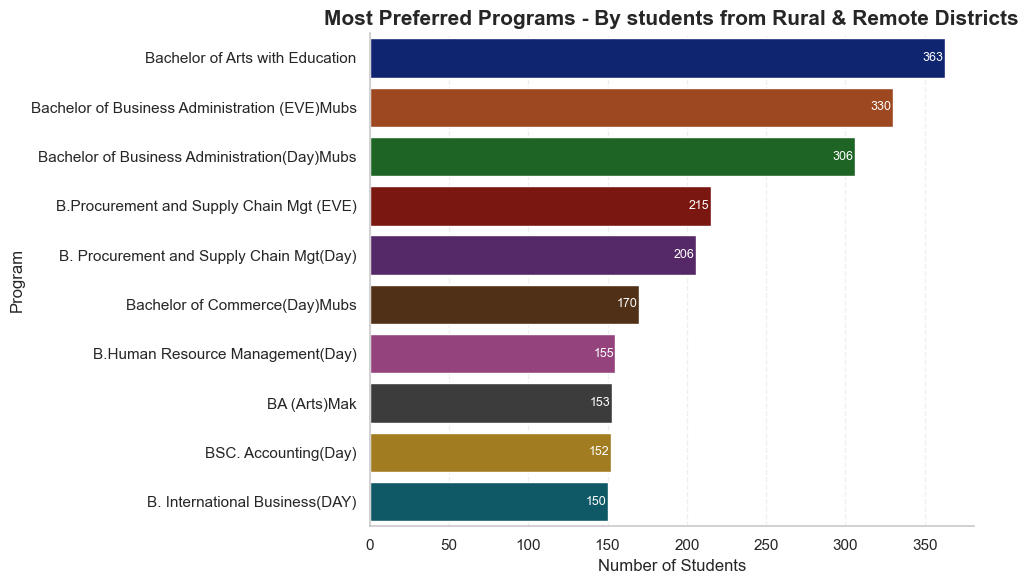

In [36]:
top_programs = rural_remote_df['program_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
bars = sns.barplot(
    x=top_programs.values, 
    y=top_programs.index, 
    palette='dark'
)

# Add labels
for i, value in enumerate(top_programs.values):
    plt.text(value - 1, i, str(value), va='center', ha='right', fontsize=9, color='white')

plt.title('Most Preferred Programs - By students from Rural & Remote Districts', fontsize=15, weight='bold')
plt.xlabel('Number of Students')
plt.ylabel('Program')
plt.grid(axis='x', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_13456\3318620344.py:30: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from current font.
  plt.tight_layout()


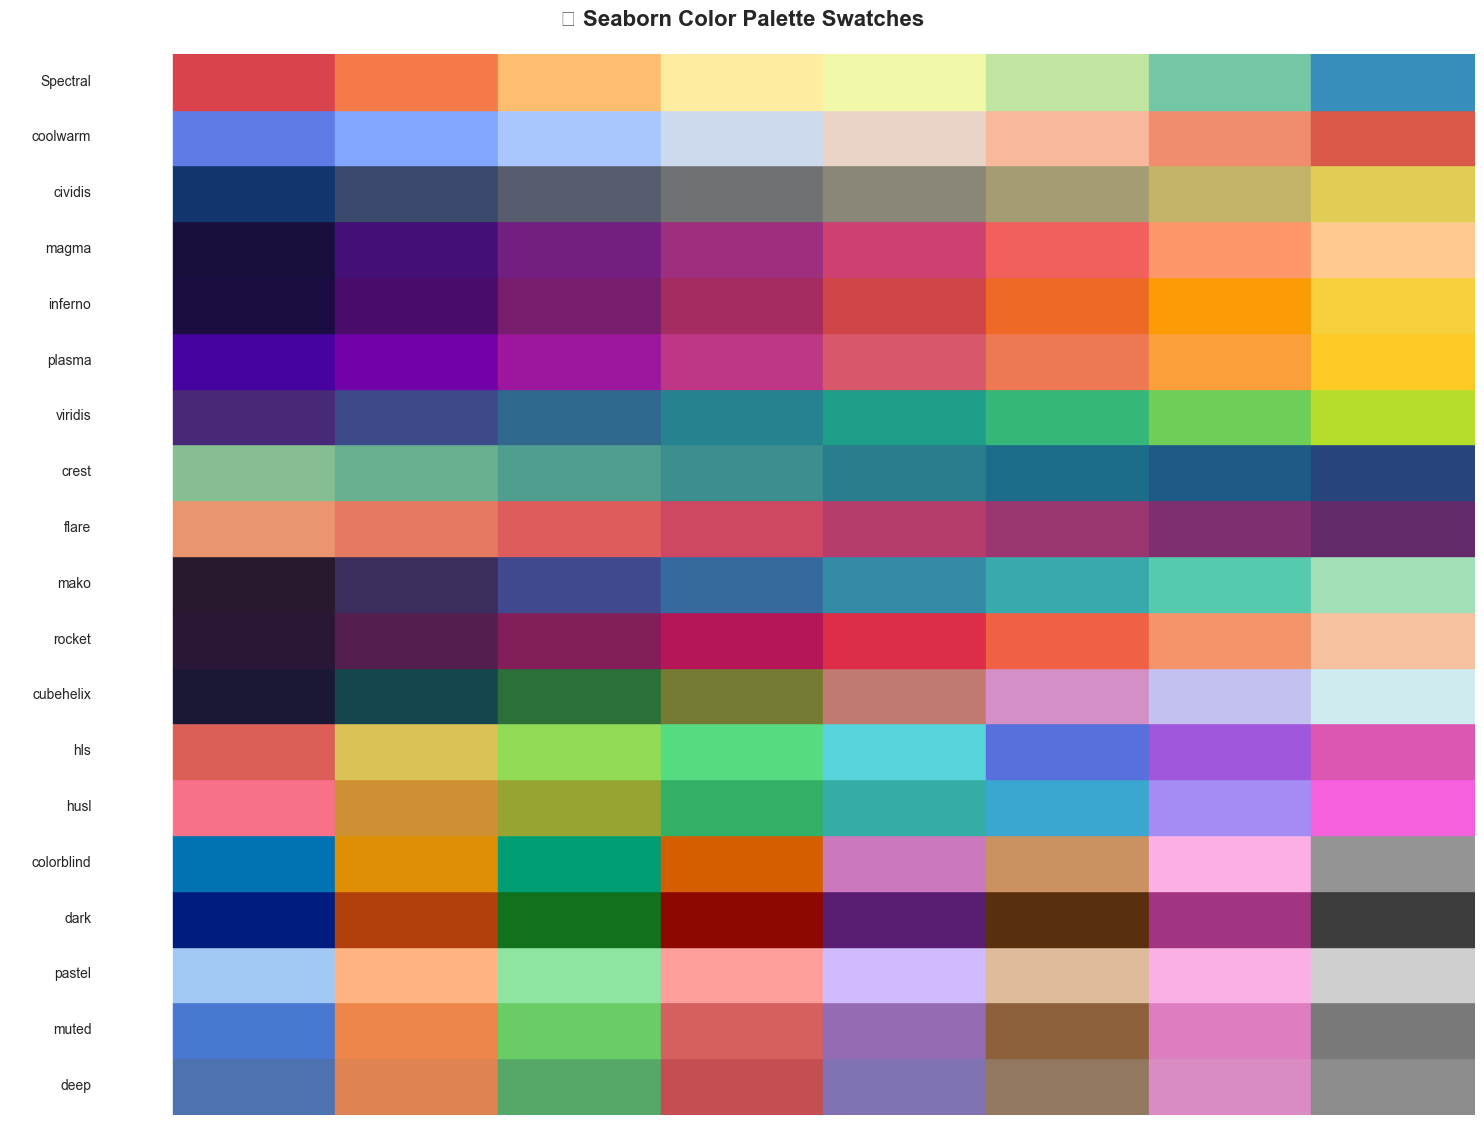

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of palettes to preview
palettes = [
    'deep', 'muted', 'pastel', 'dark', 'colorblind',
    'husl', 'hls', 'cubehelix', 'rocket', 'mako', 
    'flare', 'crest', 'viridis', 'plasma', 'inferno',
    'magma', 'cividis', 'coolwarm', 'Spectral'
]

# Number of colors to display per palette
n_colors = 8

# Plot
plt.figure(figsize=(15, len(palettes) * 0.6))

for i, palette_name in enumerate(palettes):
    colors = sns.color_palette(palette_name, n_colors)
    for j, color in enumerate(colors):
        plt.fill_between([j, j+1], i, i+1, color=color)

    plt.text(-0.5, i + 0.5, palette_name, va='center', ha='right', fontsize=10)

# Formatting
plt.xlim(-1, n_colors)
plt.ylim(0, len(palettes))
plt.axis('off')
plt.title("🎨 Seaborn Color Palette Swatches", fontsize=16, weight='bold', pad=20)
plt.tight_layout()
plt.show()


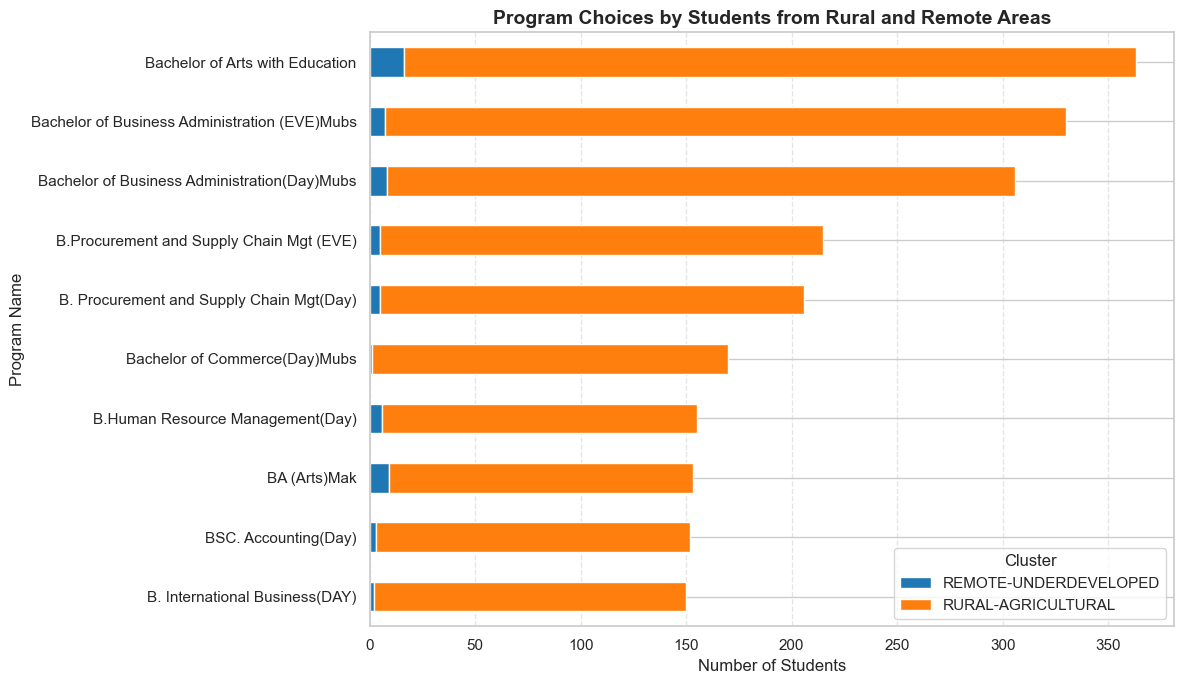

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter only rural and remote
rural_remote_df = df[df['cluster'].isin(['RURAL-AGRICULTURAL', 'REMOTE-UNDERDEVELOPED'])]

# Count by program and cluster
pivot = rural_remote_df.groupby(['program_name', 'cluster']).size().unstack().fillna(0)

# Sort by total count
pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).head(10).index]

# Plot
pivot.plot(kind='barh', stacked=True, figsize=(12, 7), color=['#1f77b4', '#ff7f0e'])

plt.title('Program Choices by Students from Rural and Remote Areas', fontsize=14, weight='bold')
plt.xlabel('Number of Students')
plt.ylabel('Program Name')
plt.legend(title='Cluster')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


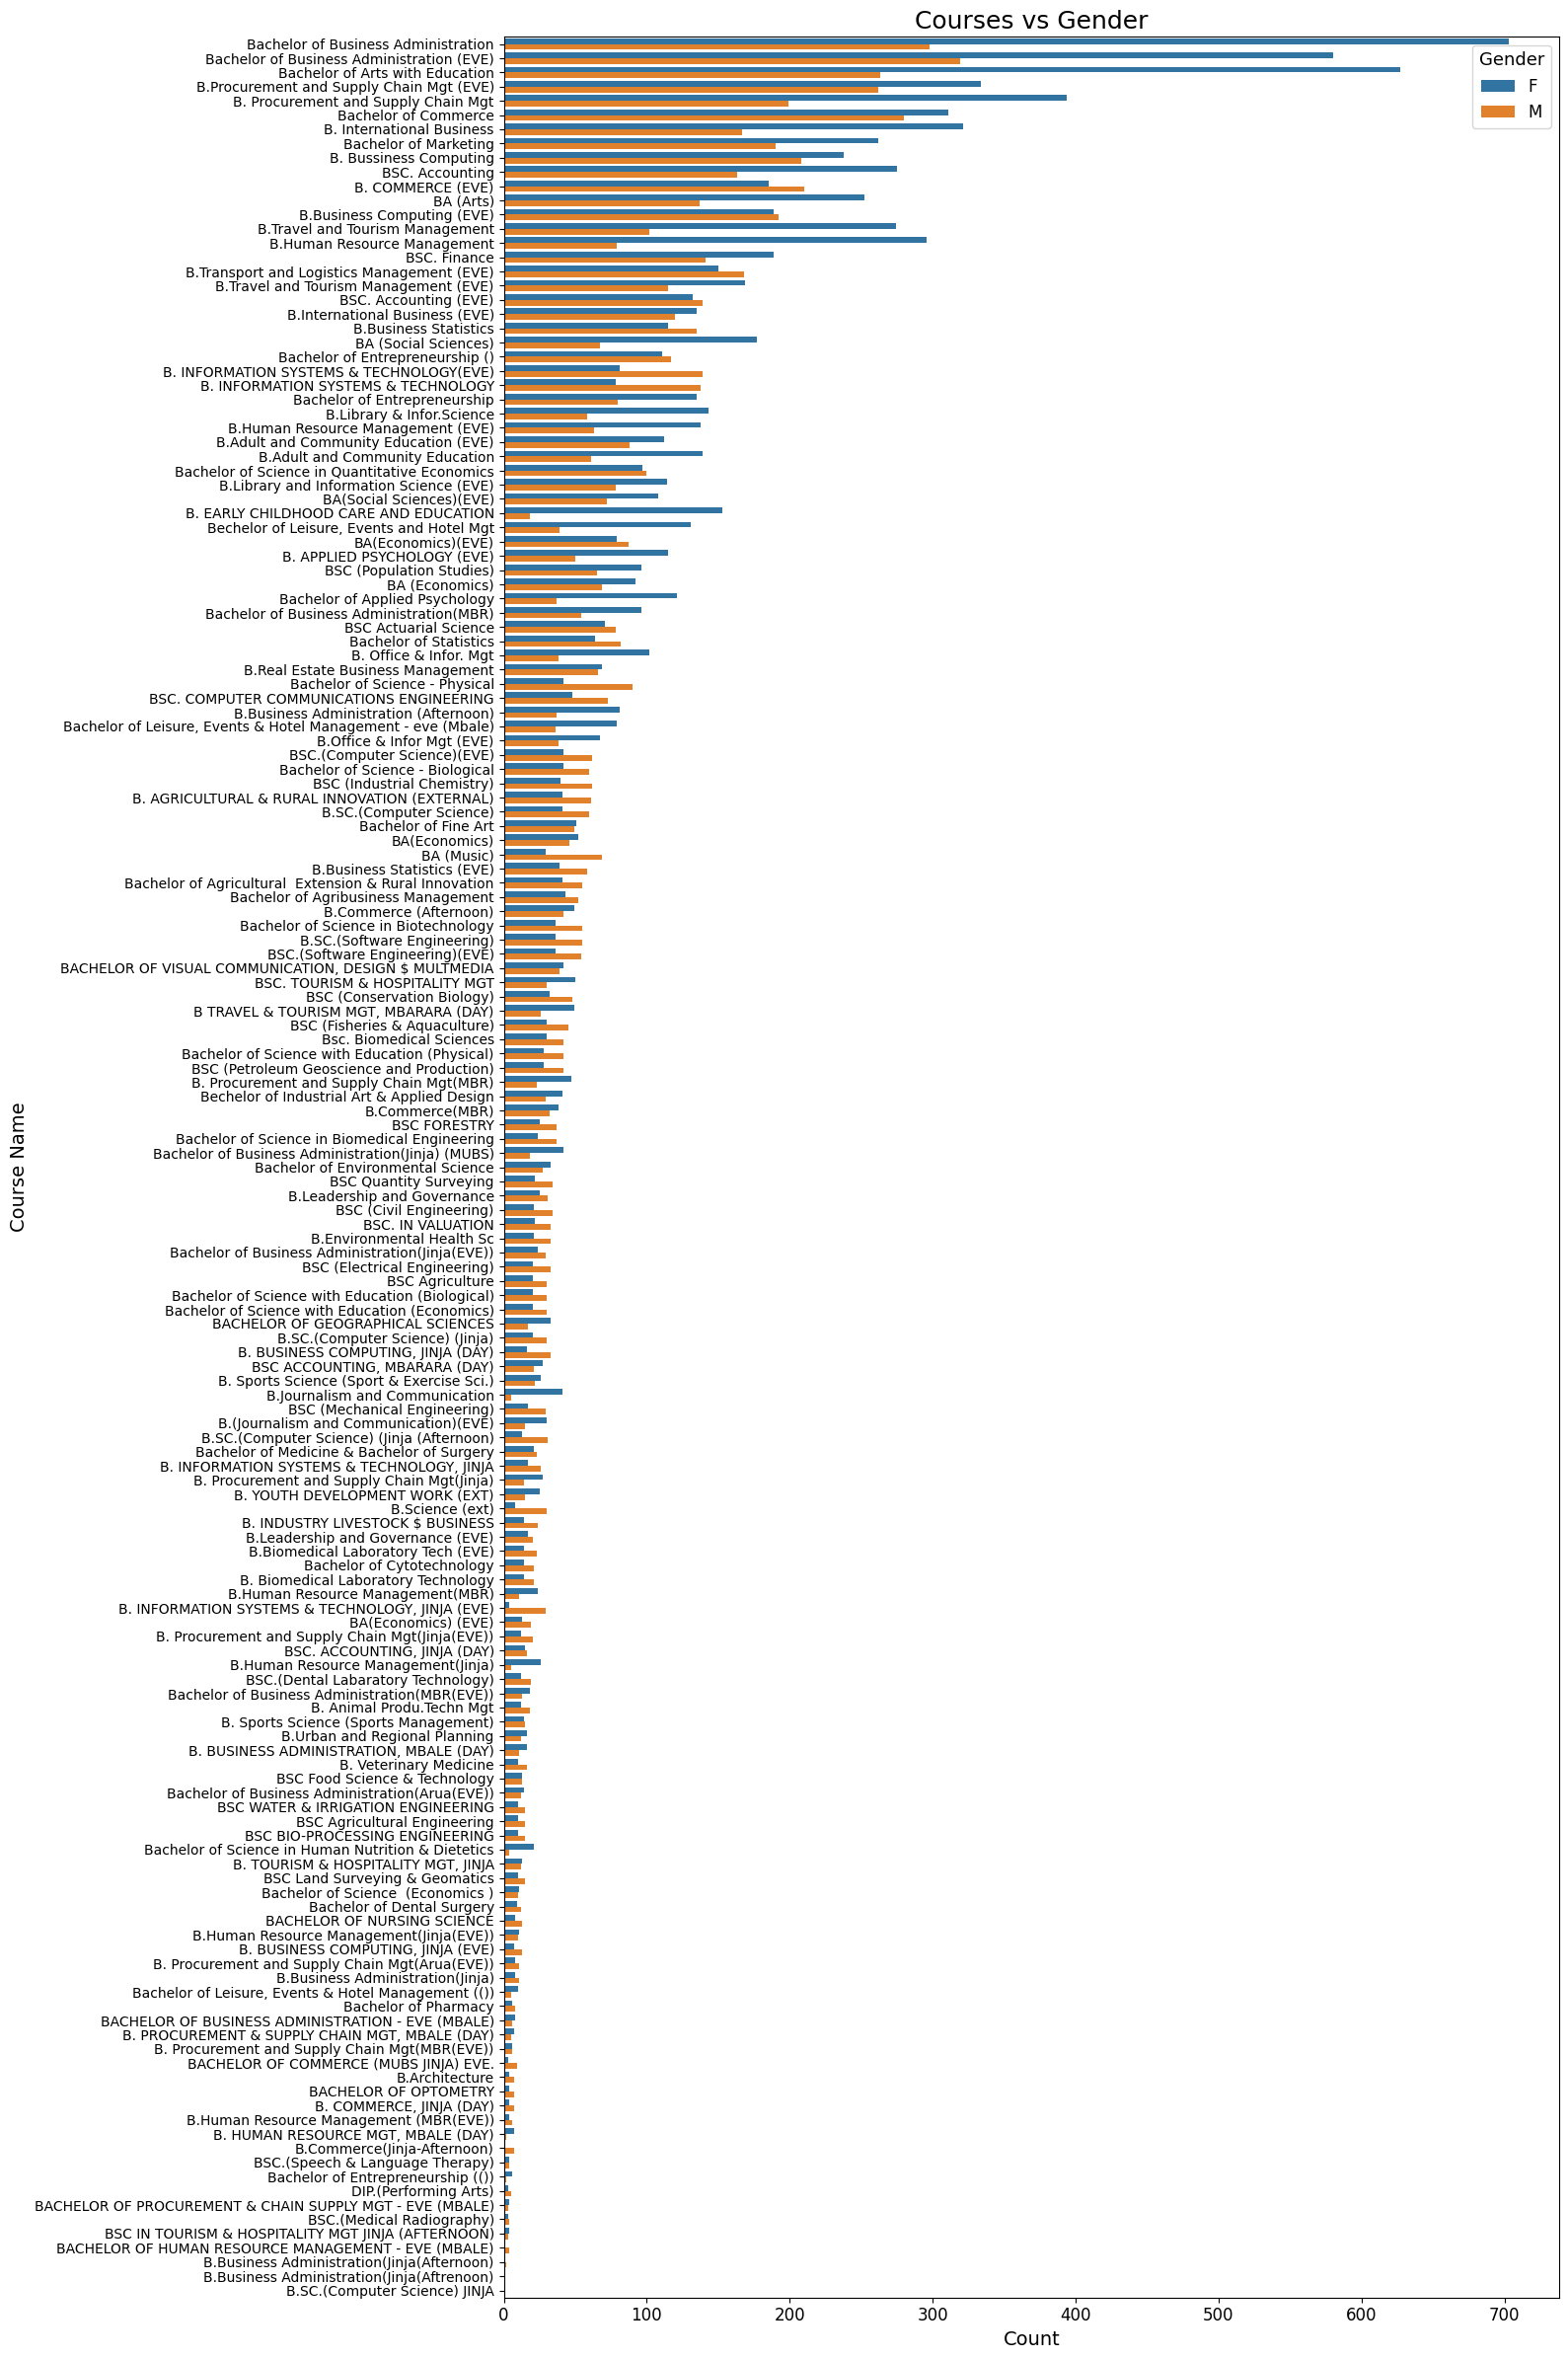

In [6]:
plt.figure(figsize=(16, 24))  # Wider and much taller for all courses
sns.countplot(
    data=df,
    y='course_name',
    hue='ge',
    order=df['course_name'].value_counts().index
)
plt.title('Courses vs Gender', fontsize=18)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Course Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.legend(title='Gender', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()


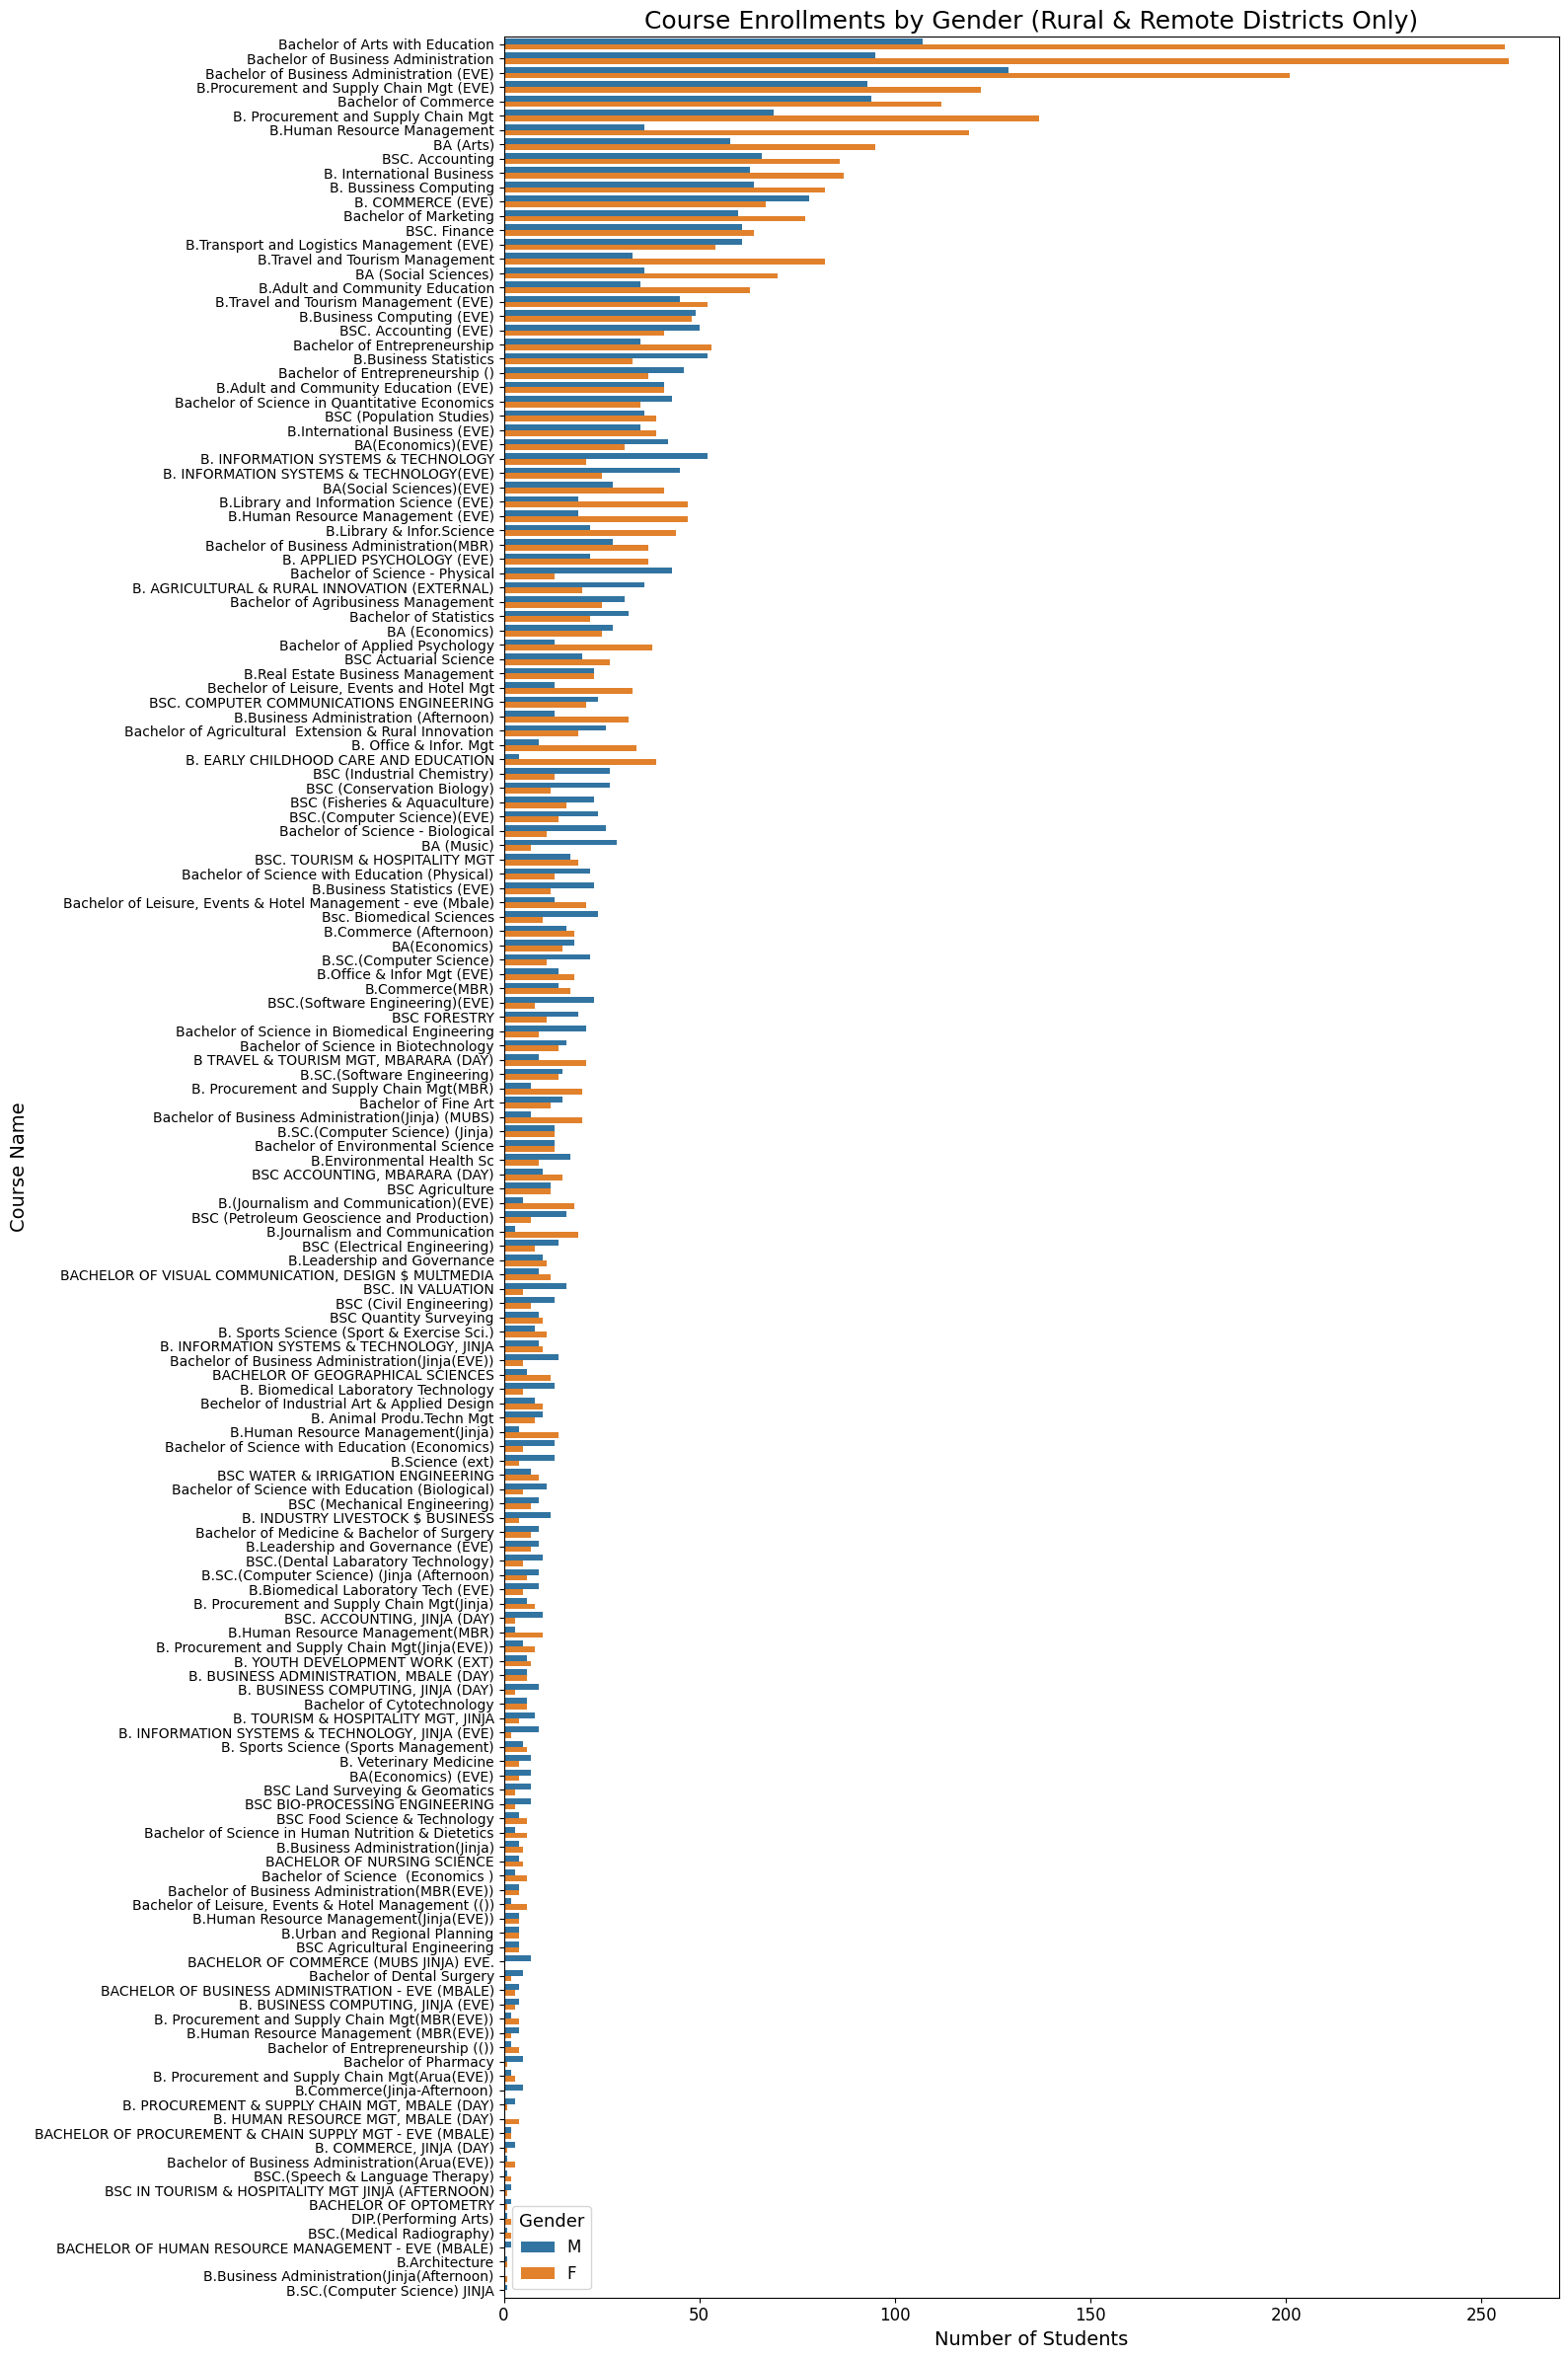

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter students from rural and remote districts
rural_remote_df = df[df['cluster'].isin(['RURAL-AGRICULTURAL', 'REMOTE-UNDERDEVELOPED'])]

# Step 2: Plot
plt.figure(figsize=(16, 24))  # Wider and taller for better readability
sns.countplot(
    data=rural_remote_df,
    y='course_name',
    hue='ge',  # Assuming 'ge' is the column for gender
    order=rural_remote_df['course_name'].value_counts().index
)

# Step 3: Customize plot
plt.title('Course Enrollments by Gender (Rural & Remote Districts Only)', fontsize=18)
plt.xlabel('Number of Students', fontsize=14)
plt.ylabel('Course Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.legend(title='Gender', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()


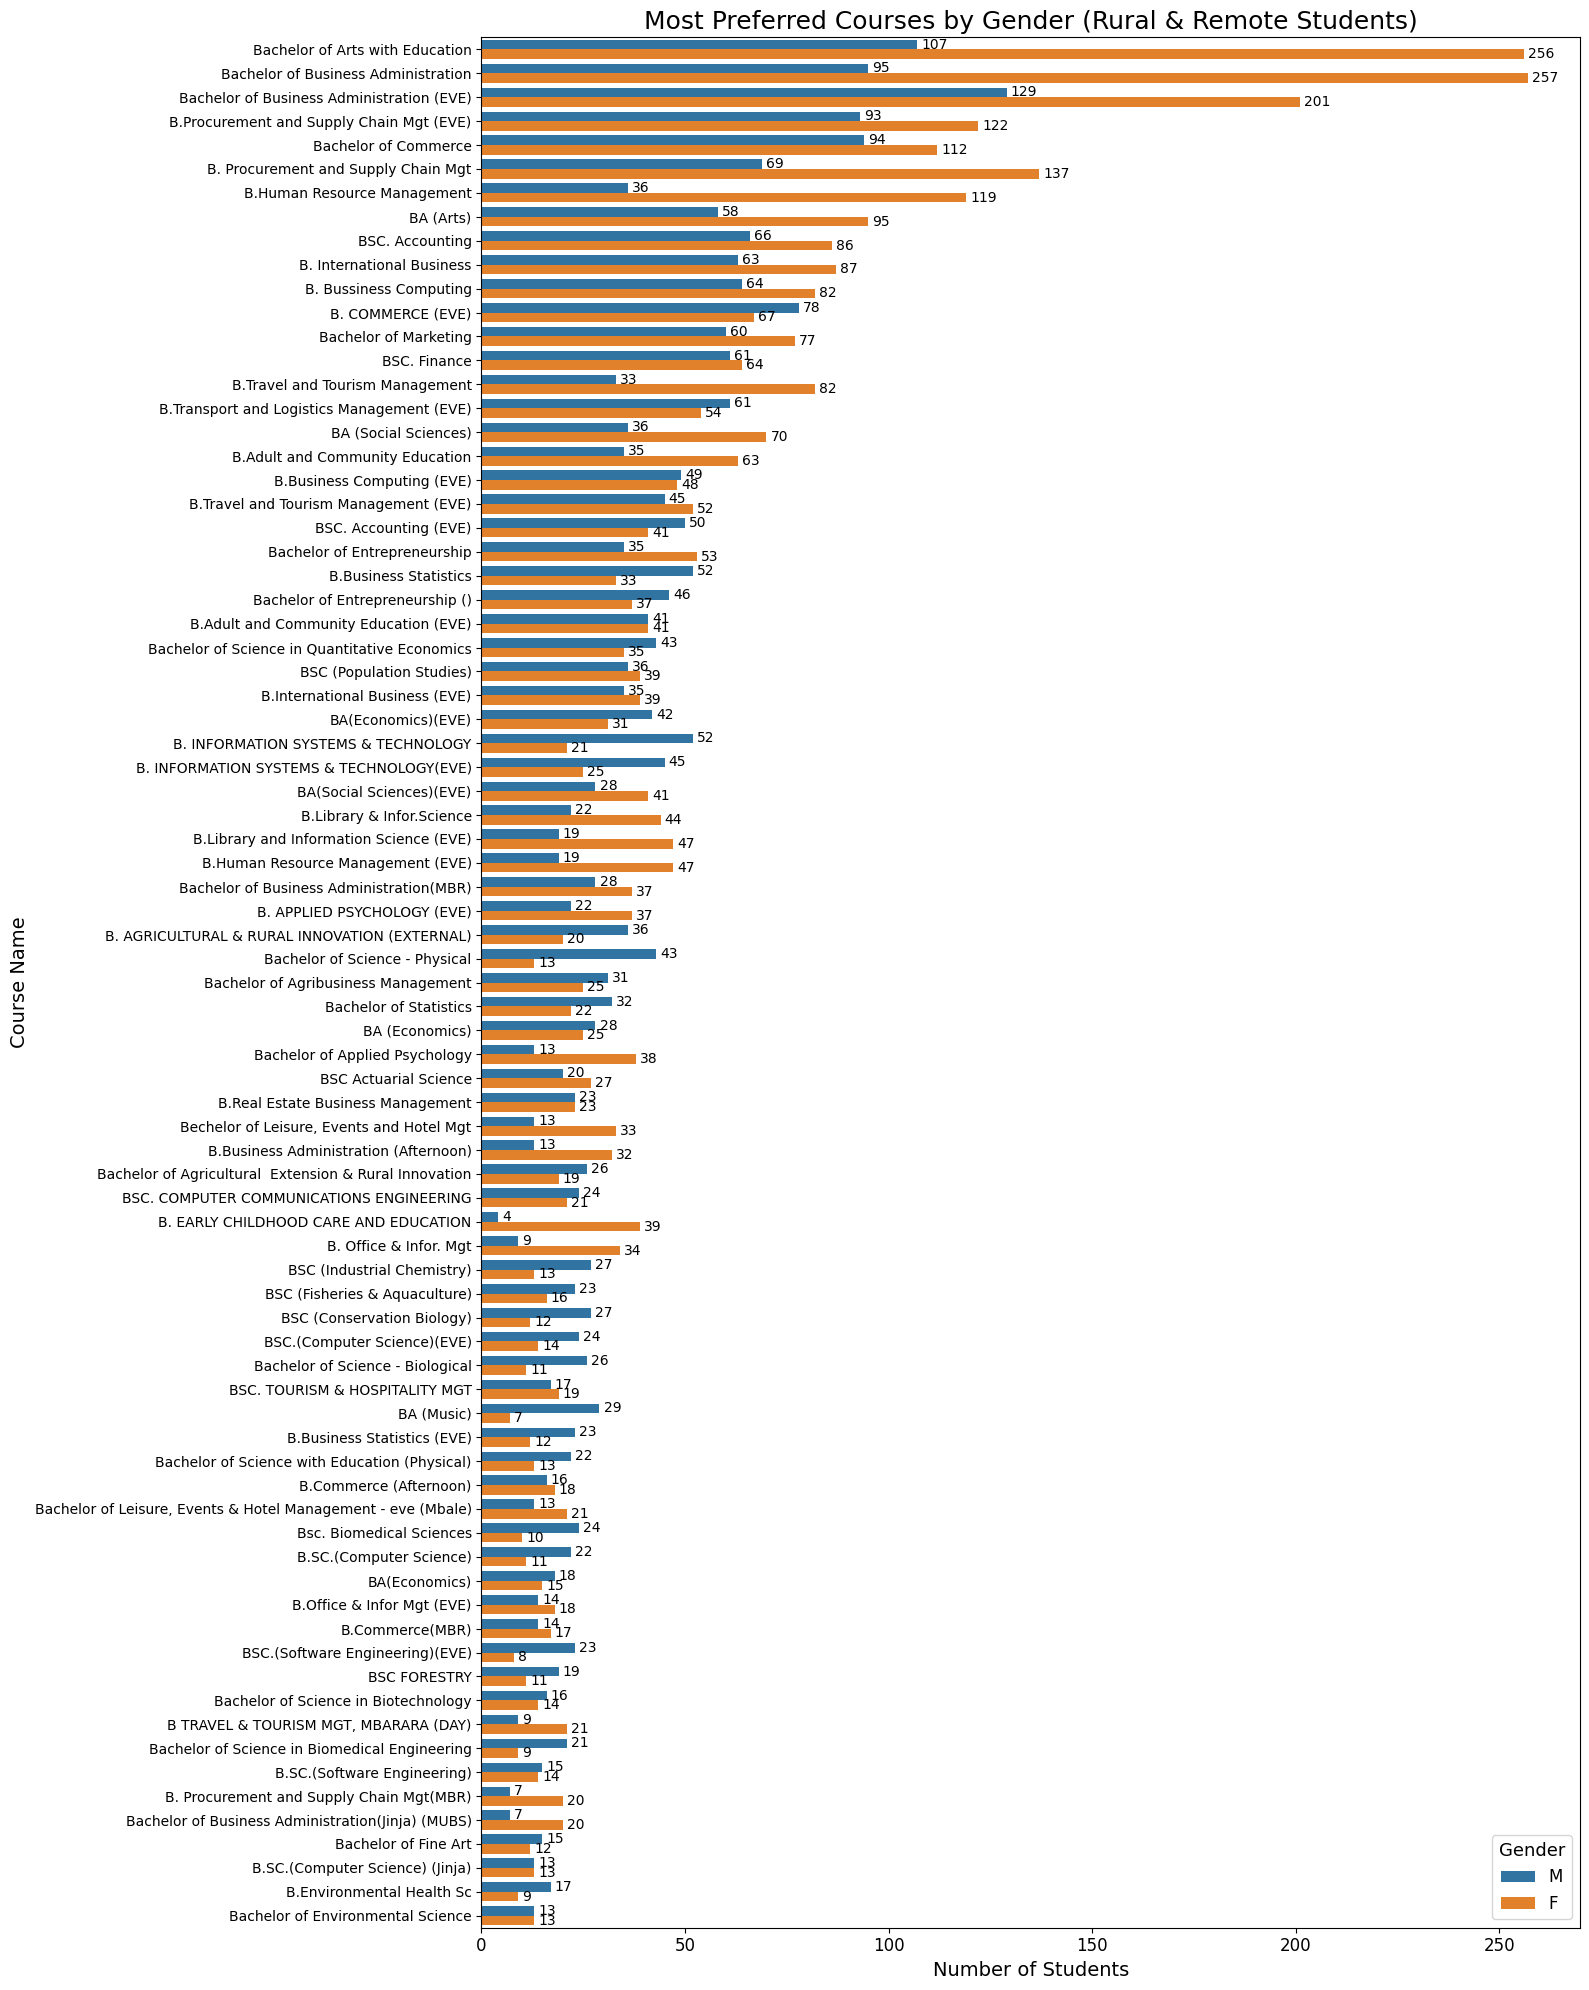

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter rural and remote students
rural_remote_df = df[df['cluster'].isin(['RURAL-AGRICULTURAL', 'REMOTE-UNDERDEVELOPED'])]

# Step 2: Get top half (most preferred courses)
course_counts = rural_remote_df['course_name'].value_counts()
half = len(course_counts) // 2
most_preferred_courses = course_counts.head(half).index
top_df = rural_remote_df[rural_remote_df['course_name'].isin(most_preferred_courses)]

# Step 3: Plot
plt.figure(figsize=(16, 20))
ax = sns.countplot(
    data=top_df,
    y='course_name',
    hue='ge',
    order=top_df['course_name'].value_counts().index
)

# Step 4: Add number labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Step 5: Customize
plt.title('Most Preferred Courses by Gender (Rural & Remote Students)', fontsize=18)
plt.xlabel('Number of Students', fontsize=14)
plt.ylabel('Course Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.legend(title='Gender', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()


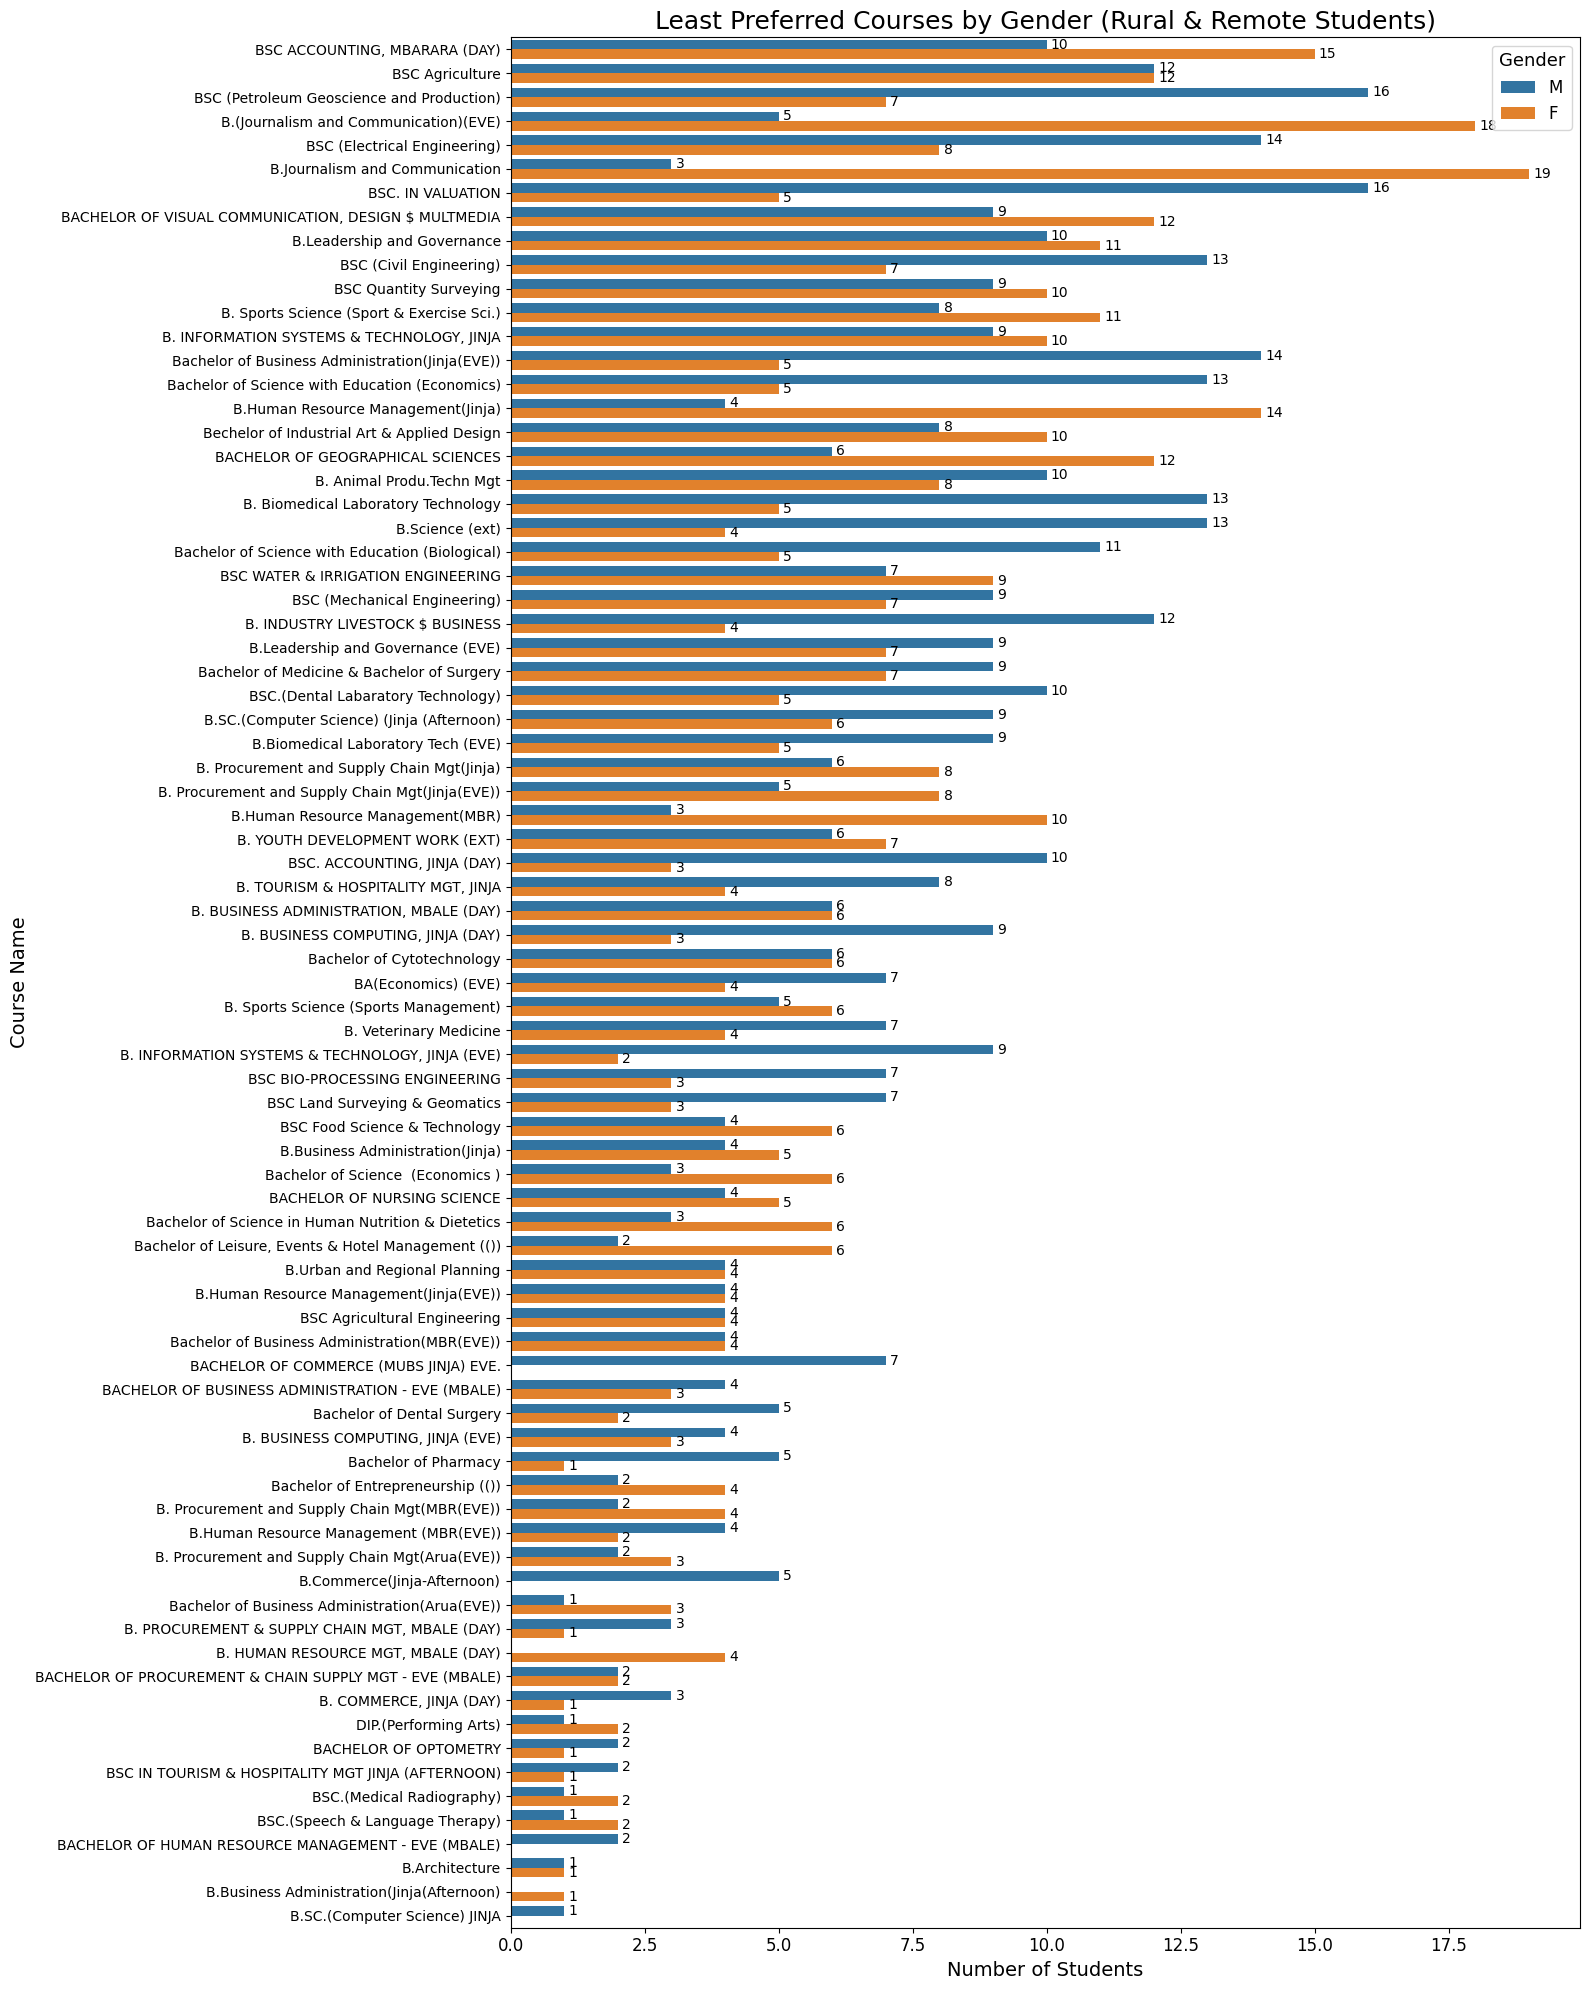

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter rural and remote students again
rural_remote_df = df[df['cluster'].isin(['RURAL-AGRICULTURAL', 'REMOTE-UNDERDEVELOPED'])]

# Step 2: Get bottom half (least preferred courses)
course_counts = rural_remote_df['course_name'].value_counts()
half = len(course_counts) // 2
least_preferred_courses = course_counts.tail(len(course_counts) - half).index
bottom_df = rural_remote_df[rural_remote_df['course_name'].isin(least_preferred_courses)]

# Step 3: Plot
plt.figure(figsize=(16, 20))
ax = sns.countplot(
    data=bottom_df,
    y='course_name',
    hue='ge',
    order=bottom_df['course_name'].value_counts().index
)

# Step 4: Add number labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Step 5: Customize
plt.title('Least Preferred Courses by Gender (Rural & Remote Students)', fontsize=18)
plt.xlabel('Number of Students', fontsize=14)
plt.ylabel('Course Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.legend(title='Gender', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter to only rural and remote students
rural_remote_df = df[df['cluster'].isin(['RURAL-AGRICULTURAL', 'REMOTE-UNDERDEVELOPED'])]

# Count by college and cluster
college_cluster_counts = rural_remote_df.groupby(['college', 'cluster']).size().unstack(fill_value=0)

# Sort by total admissions to highlight major colleges
college_cluster_counts['Total'] = college_cluster_counts.sum(axis=1)
college_cluster_counts = college_cluster_counts.sort_values('Total', ascending=False).drop(columns='Total')

# Plot
plt.figure(figsize=(12, 7))
college_cluster_counts.plot(kind='bar', stacked=False, figsize=(14, 7), color=['#1f77b4', '#ff7f0e'])

# Aesthetics
plt.title("🎓 Admissions from Rural & Remote Areas by College", fontsize=16, weight='bold')
plt.xlabel("College", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title="Cluster", fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()


KeyError: 'college'